# Проект: Определение перспективного тарифа для телеком компании

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открытие-файла-с-данными-и-изучение-общей-информации" data-toc-modified-id="Открытие-файла-с-данными-и-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открытие файла с данными и изучение общей информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Поиск-аномалий" data-toc-modified-id="Поиск-аномалий-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Поиск аномалий</a></span></li><li><span><a href="#Тип-данных" data-toc-modified-id="Тип-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Тип данных</a></span></li><li><span><a href="#Объединение-в-одну-таблицу" data-toc-modified-id="Объединение-в-одну-таблицу-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Объединение в одну таблицу</a></span></li><li><span><a href="#Подсчёты-по-тарифам" data-toc-modified-id="Подсчёты-по-тарифам-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Подсчёты по тарифам</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Затраты-траффика" data-toc-modified-id="Затраты-траффика-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Затраты траффика</a></span></li><li><span><a href="#Средняя,-дисперсия,-стандартное-отклонение" data-toc-modified-id="Средняя,-дисперсия,-стандартное-отклонение-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Средняя, дисперсия, стандартное отклонение</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза:-Средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различается" data-toc-modified-id="Гипотеза:-Средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различается-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Гипотеза: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается</a></span></li><li><span><a href="#Гипотеза:-Средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов" data-toc-modified-id="Гипотеза:-Средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Гипотеза: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

**Описание проекта**<br>
Я занимаюсь аналитикой в компании "Мегалайн" - федеральном операторе сотовой связи. Клиентам в компании предлагается два тарифных плана: "Смарт" и "Ультра". Для корректировки рекламного бюджета, коммерческий департамент оператора хочет понять, какой тариф приносит больше прибыли.<br>
Мне необходимо провести предварительный анализ тарифных планов на небольшой выборке клиентов. Мне даны данные 500 пользователей оператора, а именно: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Мне предстоит провести анализ поведения клиентов и сделать вывод - какой тариф лучше.

## Открытие файла с данными и изучение общей информации

Мне даны несколько файлов с данными. Откроем все и посмотрим что там:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
def information(data):
    print(data.head())
    print()
    print(data.info())
df_calls = pd.read_csv('/datasets/calls.csv')
information(df_calls)
    

       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


In [3]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
df_internet = pd.read_csv('/datasets/internet.csv')
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
df_messages = pd.read_csv('/datasets/messages.csv')
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [11]:
df_users = pd.read_csv('/datasets/users.csv')
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [12]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Какие действия можно произвести на первый взгляд:
- Проверить аномалии в колонке возраста абонентов;
- Перевести все колонки с датами в формат даты;
- Объединить таблицы со звонками, сообщениями и интернетом в одну таблицу;
- Колонки со временем разговора и мегабайтами траффика округлить и перевести в целые значения.

Далее посмотрим что получится и при необходимости произведём нужные действия.

## Предобработка данных

### Поиск аномалий

Для начала посмотрим, нет ли аномалий в колонке с возрастом абонентов:

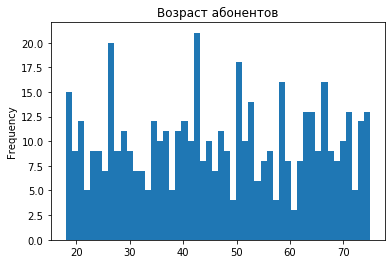

In [13]:
df_users['age'].plot(kind='hist', bins=50, title='Возраст абонентов')
plt.show()

Как видно, аномальных возрастов в данных нет.

In [14]:
df_internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


Ещё обратил внимание на то, что в таблице с интернетом есть колонка "Unnamed", которая просто дублирует номера индексов в таблице. Чтобы это исправить загрузим этот датасет немного иначе:

In [15]:
df_internet = pd.read_csv('/datasets/internet.csv', index_col=0)
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Теперь лишней колонки нет, данные не изменились.

### Тип данных

Теперь округлим и переведём в целые значения колонки с минутами разговора и мегабайтами трафика. По условию, оператор округляет все значения в большую сторону. Для этого используем библиотеку numpy и функцию ceil. Создадим функцию, которая будет все значения в колонках округлять в большую сторону и переводить в целые значения, и после применим её к нужным нам колонкам:

In [16]:
def round_duration(column):
    return np.ceil(column).astype('int')

df_calls['duration'] = df_calls['duration'].apply(round_duration)
df_internet['mb_used'] = df_internet['mb_used'].apply(round_duration)

In [17]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [18]:
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


Получили округлённые целые значения в необходимых нам колонках.<br>
Теперь переведём колонки с датами во всех таблицах в формат даты:

In [19]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

Создадим в таблицах со звонками, интернет триффиком и сообщениями колонки с месяцами. Это поможет в дальнейшем сгруппировать таблицы и объединить их в одну таблицу.

In [20]:
df_calls['month'] = df_calls['call_date'].dt.month
df_internet['month'] = df_internet['session_date'].dt.month
df_messages['month'] = df_messages['message_date'].dt.month

Теперь мы можем сгруппировать каждую из этих таблиц таким образом, чтобы получить сколько в каком месяце каждый абонент потратил минут, смс и мегабайт.

In [21]:
user_calls = df_calls.groupby(['user_id', 'month'])\
                        .agg({'duration':'sum'}).reset_index().rename(columns = {'duration': 'minutes'})
user_calls.head()

,user_id,month,minutes
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466


In [22]:
user_messages = df_messages.groupby(['user_id', 'month'])\
                            .agg({'id':'count'}).reset_index().rename(columns= {'id':'messages'})
user_messages.head()

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [23]:
user_internet = df_internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index()
user_internet.head()

,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


### Объединение в одну таблицу

Теперь можно объединить эти данные в одну таблицу:

In [24]:
df = user_calls.merge(user_messages, on=['user_id', 'month'], how='outer')
df = df.merge(user_internet, on=['user_id', 'month'], how='outer')
df.head()

,user_id,month,minutes,messages,mb_used
0,1000,5,159.0,22.0,2256.0
1,1000,6,172.0,60.0,23257.0
2,1000,7,340.0,75.0,14016.0
3,1000,8,408.0,81.0,14070.0
4,1000,9,466.0,57.0,14581.0


In [25]:
df.isna().sum()

user_id       0
month         0
minutes      40
messages    497
mb_used      11
dtype: int64

Таблицы объединены. Теперь в колонках со звонками, сообщениями и интернетом появились пропущенные значения там где не было использования услуг. Их можно заменить нулями и перевести данные в целые числа:

In [26]:
df = df.fillna(0).astype('int')
df.head()

,user_id,month,minutes,messages,mb_used
0,1000,5,159,22,2256
1,1000,6,172,60,23257
2,1000,7,340,75,14016
3,1000,8,408,81,14070
4,1000,9,466,57,14581


Теперь можно присоединять сюда таблицу с данными пользователей:

In [27]:
df = df.merge(df_users, how='left')
df.head()

,user_id,month,minutes,messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159,22,2256,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172,60,23257,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340,75,14016,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408,81,14070,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466,57,14581,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Далее надо переименовать название столбца с тарифами в таблице тарифов, чтобы можно было продолжить дальнейшее объединение:

In [28]:
df_tariffs.rename(columns = {'tariff_name':'tariff'}, inplace=True)
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Присоединяем таблицу с тарифами:

In [29]:
df = df.merge(df_tariffs, how='left')
df.head()

,user_id,month,minutes,messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159,22,2256,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172,60,23257,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340,75,14016,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408,81,14070,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466,57,14581,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 19 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
minutes                  3214 non-null int64
messages                 3214 non-null int64
mb_used                  3214 non-null int64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-null int64
dtypes: datetime6

Таблица готова. Пропущенных значений нет, типы данных приведены в необходимые значения.

### Подсчёты по тарифам

Сейчас нам надо посчитать сколько абоненты потратили сверх своего тарифного плана.<br>
Для удобства будем смотреть те колонки, которые нас интересуют:

In [31]:
df[['minutes', 'messages', 'mb_used', 'messages_included', 'mb_per_month_included',
    'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute']].head()

,minutes,messages,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,159,22,2256,1000,30720,3000,1950,150,1,1
1,172,60,23257,1000,30720,3000,1950,150,1,1
2,340,75,14016,1000,30720,3000,1950,150,1,1
3,408,81,14070,1000,30720,3000,1950,150,1,1
4,466,57,14581,1000,30720,3000,1950,150,1,1


Теперь добавим колонки с подсчётами по превышению тарифа.<br>
В колонке с перерасходом интернета сразу пересчитаем мегабайты в гигабайты и округлим до целых значений в большую сторону(по условию оператора). Для округления воспользуемся созданной ранее функцией:

In [32]:
df['call_over'] = df['minutes'] - df['minutes_included']
df['message_over'] = df['messages'] - df['messages_included']
df['gb_over'] = ((df['mb_used'] - df['mb_per_month_included']) / 1024).apply(round_duration)

Посмотрим что получилось:

In [33]:
df[['minutes', 'messages', 'mb_used', 'messages_included', 'mb_per_month_included',
    'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
    'call_over', 'message_over', 'gb_over']].head(10)

,minutes,messages,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_over,message_over,gb_over
0,159,22,2256,1000,30720,3000,1950,150,1,1,-2841,-978,-27
1,172,60,23257,1000,30720,3000,1950,150,1,1,-2828,-940,-7
2,340,75,14016,1000,30720,3000,1950,150,1,1,-2660,-925,-16
3,408,81,14070,1000,30720,3000,1950,150,1,1,-2592,-919,-16
4,466,57,14581,1000,30720,3000,1950,150,1,1,-2534,-943,-15
5,350,73,14717,1000,30720,3000,1950,150,1,1,-2650,-927,-15
6,338,58,14768,1000,30720,3000,1950,150,1,1,-2662,-942,-15
7,333,70,9827,1000,30720,3000,1950,150,1,1,-2667,-930,-20
8,430,0,18452,50,15360,500,550,200,3,3,-70,-50,4
9,414,0,14053,50,15360,500,550,200,3,3,-86,-50,-1


Все значения, которые получились со знаком минус обозначают, что абонент не превысил лимит по тарифу. Теперь посчитаем сколько каждый абонент должен был заплатить за тариф плюс за перерасход, если таковой был. Создадим функцию, которая сделает все расчёты и выведем результаты в отдельный столбец:

In [34]:
def call_pay(row):
    total = row['rub_monthly_fee']
    if row['call_over'] > 0:
        total += row['call_over'] * row['rub_per_minute']
    if row['message_over'] > 0:
        total += row['message_over'] * row['rub_per_message']
    if row['gb_over'] > 0:
        total += row['gb_over'] * row['rub_per_gb']
    return total

df['total_bill'] = df.apply(call_pay, axis=1)

Посмотрим что получилось и работает ли подсчёт. Возьмём строки, в которых есть перерасход по минутам:

In [35]:
(df[['minutes', 'messages', 'mb_used', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
    'call_over', 'message_over', 'gb_over', 'total_bill']])[df['call_over'] > 0].head()

,minutes,messages,mb_used,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_over,message_over,gb_over,total_bill
32,606,56,11117,550,200,3,3,106,6,-4,886
33,712,41,9365,550,200,3,3,212,-9,-5,1186
34,595,42,7877,550,200,3,3,95,-8,-7,835
35,612,47,9875,550,200,3,3,112,-3,-5,886
36,569,56,7703,550,200,3,3,69,6,-7,775


Получили колонку с подсчётами: сколько абонент тратил денег ежемесячно с учётом абонентской платы.
Проверим, правильно ли работает подсчёт. Возьмём самую верхнюю строчку.<br>
Абонент платит 550 руб. в месяц за тариф, был перерасход на 106 минут по тарифу 3 руб. за минуту, и перерасход на 6 смс по тарифу 3 руб. за смс.<br>
Посчитаем:

In [36]:
550 + (106 * 3) + (6 * 3)

886

Всё сходится, подсчёт работает корректно. Можно двигаться дальше.

## Анализ данных

### Затраты траффика

Приступим к анализу данных.<br>
Посмотрим cколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.<br>
Для начала, думаю стоит разделить таблицу на две, где у каждой будет свой тариф:

In [37]:
df_ultra = df[df['tariff'] == 'ultra']
df_smart = df[df['tariff'] == 'smart']

In [38]:
df_ultra.head()

,user_id,month,minutes,messages,mb_used,age,churn_date,city,first_name,last_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_over,message_over,gb_over,total_bill
0,1000,5,159,22,2256,52,NaT,Краснодар,Рафаил,Верещагин,...,30720,3000,1950,150,1,1,-2841,-978,-27,1950
1,1000,6,172,60,23257,52,NaT,Краснодар,Рафаил,Верещагин,...,30720,3000,1950,150,1,1,-2828,-940,-7,1950
2,1000,7,340,75,14016,52,NaT,Краснодар,Рафаил,Верещагин,...,30720,3000,1950,150,1,1,-2660,-925,-16,1950
3,1000,8,408,81,14070,52,NaT,Краснодар,Рафаил,Верещагин,...,30720,3000,1950,150,1,1,-2592,-919,-16,1950
4,1000,9,466,57,14581,52,NaT,Краснодар,Рафаил,Верещагин,...,30720,3000,1950,150,1,1,-2534,-943,-15,1950


In [39]:
df_smart.head()

,user_id,month,minutes,messages,mb_used,age,churn_date,city,first_name,last_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_over,message_over,gb_over,total_bill
8,1001,11,430,0,18452,41,NaT,Москва,Иван,Ежов,...,15360,500,550,200,3,3,-70,-50,4,1350
9,1001,12,414,0,14053,41,NaT,Москва,Иван,Ежов,...,15360,500,550,200,3,3,-86,-50,-1,550
10,1002,6,117,4,10871,59,NaT,Стерлитамак,Евгений,Абрамович,...,15360,500,550,200,3,3,-383,-46,-4,550
11,1002,7,214,11,17601,59,NaT,Стерлитамак,Евгений,Абрамович,...,15360,500,550,200,3,3,-286,-39,3,1150
12,1002,8,289,13,20347,59,NaT,Стерлитамак,Евгений,Абрамович,...,15360,500,550,200,3,3,-211,-37,5,1550


Теперь посмотрим и посравниваем таблицы. Выведем сводные таблицы со средними показателями по месяцам:

In [40]:
df_ultra_mean = df_ultra.pivot_table(
    values=['minutes', 'messages', 'mb_used'], index='month', aggfunc=('mean')).round(1)
df_smart_mean = df_smart.pivot_table(
    values=['minutes', 'messages', 'mb_used'], index='month', aggfunc=('mean')).round(1)

Далее сравним средние затраты минут, смс и мегабайт по месяцам:

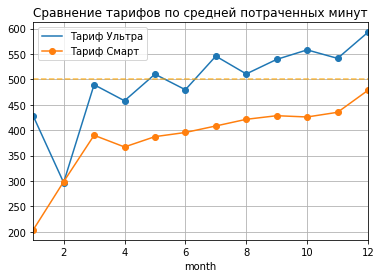

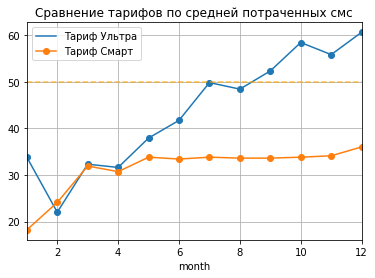

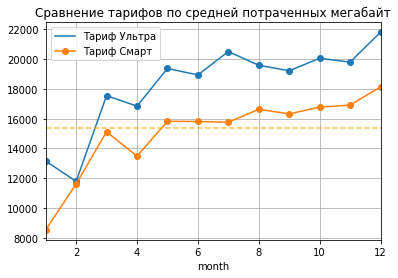

In [41]:
df_ultra_mean['minutes'].plot(style='o-', grid=True, legend=True, label='Тариф Ультра',
                              title='Сравнение тарифов по средней потраченных минут')
df_smart_mean['minutes'].plot(style='o-', grid=True, legend=True, label='Тариф Смарт')
plt.axhline(500, c='orange', linestyle='--', alpha=.7)
plt.show()

df_ultra_mean['messages'].plot(style='o-', grid=True, legend=True, label='Тариф Ультра',
                              title='Сравнение тарифов по средней потраченных смс')
df_smart_mean['messages'].plot(style='o-', grid=True, legend=True, label='Тариф Смарт')
plt.axhline(50, c='orange', linestyle='--', alpha=.7)
plt.show()

df_ultra_mean['mb_used'].plot(style='o-', grid=True, legend=True, label='Тариф Ультра',
                              title='Сравнение тарифов по средней потраченных мегабайт')
df_smart_mean['mb_used'].plot(style='o-', grid=True, legend=True, label='Тариф Смарт')
plt.axhline(15360, c='orange', linestyle='--', alpha=.7)
plt.show()

Пунктирной горизонтальной линией отметил ежемесячный лимит по тарифу "Смарт". Лимит по тарифу "Ультра" ещё настолько далеко, что при его добавлении графики сильно сжимаются и становятся совершенно неинформативными.<br>
Как видно, средние месячные затраты по обоим тарифам не превышают границ по лимитам, за исключением мегабайт по тарифу "Смарт".<br>
Таким образом, можно предположить, что абоненты на тарифе "Смарт" переплачивают за интернет и тем самым приносят дополнительную выручку оператору.

### Средняя, дисперсия, стандартное отклонение

Посчитаем среднее количество, дисперсию и стандартное отклонение по колонкам минут, сообщений и мегабайт. Построим гистограммы. Опишем распределения.<br>
Выведем метод describe для нужных колонок в разных тарифах и посмотрим на показатели:

In [42]:
df_smart[['minutes', 'messages', 'mb_used']].describe()

,minutes,messages,mb_used
count,2229.000000,2229.000000,2229.000000
mean,417.934948,33.384029,16229.188425
std,190.313730,28.227876,5877.576978
min,0.000000,0.000000,0.000000
25%,282.000000,10.000000,12658.000000
50%,422.000000,28.000000,16531.000000
75%,545.000000,51.000000,20068.000000
max,1435.000000,143.000000,38610.000000


In [43]:
df_ultra[['minutes', 'messages', 'mb_used']].describe()

,minutes,messages,mb_used
count,985.000000,985.000000,985.000000
mean,526.623350,49.363452,19486.901523
std,317.606098,47.804457,10096.317202
min,0.000000,0.000000,0.000000
25%,284.000000,6.000000,11785.000000
50%,518.000000,38.000000,19324.000000
75%,752.000000,79.000000,26863.000000
max,1673.000000,224.000000,49789.000000


Теперь построим гистограммы и сравним показатели анналогичных колонок в разных тарифах.<br>
Начнём с колонок с минутами:

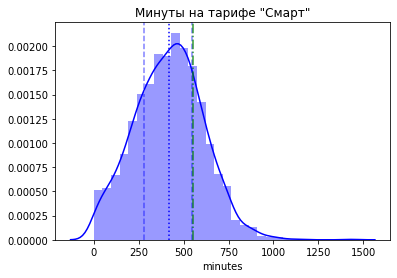

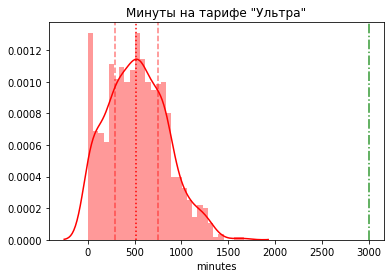

In [44]:
sns.distplot(df_smart['minutes'], bins=30, color='blue', label='smart')
plt.axvline(282, c='b', linestyle='--', alpha=.5)
plt.axvline(418, c='b', linestyle=':')
plt.axvline(545, c='b', linestyle='--', alpha=.5)
plt.axvline(550, c='g', linestyle='-.', alpha=.8)
plt.title('Минуты на тарифе "Смарт"')
plt.show()

sns.distplot(df_ultra['minutes'], bins=30, color='red', label='ultra')
plt.axvline(284, c='red', linestyle='--', alpha=.5)
plt.axvline(518, c='red', linestyle=':')
plt.axvline(752, c='red', linestyle='--', alpha=.5)
plt.axvline(3000, c='g', linestyle='-.', alpha=.8)
plt.title('Минуты на тарифе "Ультра"')
plt.show()

Здесь и далее вертикальными линиями обозначал у каждого тарифа:
- пунктирная - средняя;
- прерывистая - дисперсия;
- штрих-пунктирная - лимит по тарифу.

Тут мы видим, что на тарифе "Смарт", основное количество потраченых минут варьируется в диапазоне от 282 до 545 минут. В то время как на тарифе "Ультра" основной диапазон: 284 - 752 минуты.<br>
Теперь посмотрим на сообщения:

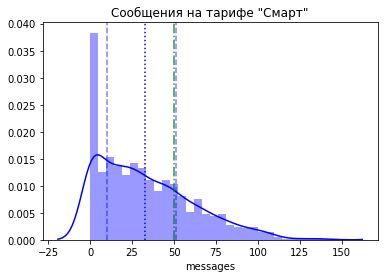

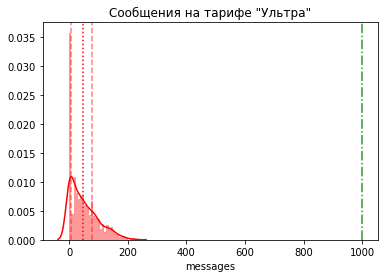

In [45]:
sns.distplot(df_smart['messages'], bins=30, color='blue', label='smart')
plt.axvline(10, c='b', linestyle='--', alpha=.5)
plt.axvline(33, c='blue', linestyle=':')
plt.axvline(51, c='b', linestyle='--', alpha=.5)
plt.axvline(50, c='g', linestyle='-.', alpha=.8)
plt.title('Сообщения на тарифе "Смарт"')
plt.show()

sns.distplot(df_ultra['messages'], bins=30, color='red', label='ultra')
plt.axvline(6, c='r', linestyle='--', alpha=.5)
plt.axvline(49, c='red', linestyle=':')
plt.axvline(79, c='r', linestyle='--', alpha=.5)
plt.axvline(1000, c='g', linestyle='-.', alpha=.8)
plt.title('Сообщения на тарифе "Ультра"')
plt.show()

В сообщениях видно, что распределения похожи. Много нулевых значений в обоих тарифах, это может быть связано с падающей популярностью смс в пользу месенджеров. В тарифе "Смарт", пользователи стараются уложиться в 50 включённых в тариф сообщений, а тарифе "Ультра" пользователи тратят больше, так как не имеют такого небольшого ограничения. Однако и не сильно больше используют по сравнению со "Смартом".<br>
Посмотрим на интернет трафик:

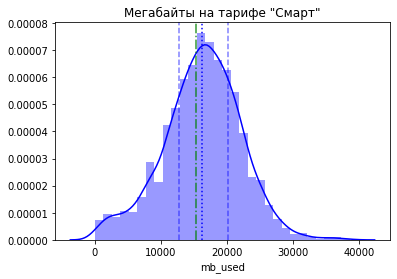

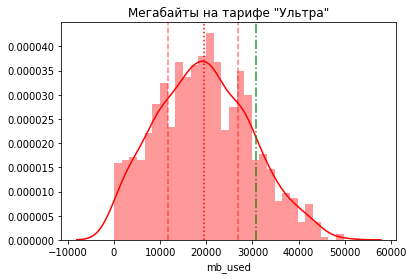

In [46]:
sns.distplot(df_smart['mb_used'], bins=30, color='blue', label='smart')
plt.axvline(12658, c='b', linestyle='--', alpha=.5)
plt.axvline(16229, c='b', linestyle=':')
plt.axvline(20068, c='b', linestyle='--', alpha=.5)
plt.axvline(15360, c='g', linestyle='-.', alpha=.8)
plt.title('Мегабайты на тарифе "Смарт"')
plt.show()

sns.distplot(df_ultra['mb_used'], bins=30, color='red', label='ultra')
plt.axvline(11785, c='r', linestyle='--', alpha=.5)
plt.axvline(19486, c='r', linestyle=':')
plt.axvline(26863, c='r', linestyle='--', alpha=.5)
plt.axvline(30720, c='g', linestyle='-.', alpha=.8)
plt.title('Мегабайты на тарифе "Ультра"')
plt.show()

Тут мы видим более естественные распределения. В тарифе "Ультра" абоненты в основном укладываются в предоставленный лимит в 30 Gb. В то время на тарифе "Смарт" большему количеству абонентов приходится выходить за рамки лимита в 15 Gb.<br>
На данном этапе также как на предыдущем видно, что абоненты обоих тарифов в основном укладываются в предоставленные лимиты, за исключением интернета на тарифе "Смарт".

## Проверка гипотез

### Гипотеза: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Проверим гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.<br>
Для проверки возьмём двухсторонюю гипотезу, так как значения могут варьироваться в обе стороны от среднего в стандартном распределении и значения с обеих сторон будут иметь значение.<br> 
Для этого, за основную гипотезу Н0 возьмём: Средняя выручка на тарифах "Смарт" и "Ультра" равны.<br>
В таком случае, альтернативная гипотеза Н1 будет звучать как раз: Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны, а значит различается.<br>
Уровень значимости возьмём стандартный: 5%. <br>
Параметр equal_var укажем как False, так как выборки различаются и это может негативно повлиять на результат исследования.<br>
Проведём исследование:

In [47]:
alpha = 0.05
results = st.ttest_ind(df_smart['total_bill'], df_ultra['total_bill'], equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем гипотезу')
else:
    print('Не отвергаем гипотезу')

p-value: 2.7240946993530856e-246
Отвергаем гипотезу


Значит, если мы отвергаем гипотезу Н0, что выручки равны, то подтверждается альтернативная гипотеза Н1, что выручки различаются.<br>
Посмотрим на цифры:

In [48]:
print('Средняя выручка на тарифе "Смарт":', df_smart['total_bill'].mean().round())
print('Средняя выручка на тарифе "Ультра":', df_ultra['total_bill'].mean().round())

Средняя выручка на тарифе "Смарт": 1295.0
Средняя выручка на тарифе "Ультра": 2071.0


Действительно выручки разные. К тому-же видно, что пользователи тарифа "Смарт" в среднем сильно выходят за рамки ежемесячной платы в 550 рублей. В то время как пользователи тарифа "Ультра" практически укладываются в лимит 1950 рублей.

### Гипотеза: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Для того, чтобы эту гипотезу проверить, сперва надо разделить общую таблицу на две. В одной будут пользователи из Москвы, в другой все остальные регионы:

In [49]:
df_moscow = df[df['city'] == 'Москва']
df_regions = df[df['city'] != 'Москва']

In [50]:
df_moscow.head()

,user_id,month,minutes,messages,mb_used,age,churn_date,city,first_name,last_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_over,message_over,gb_over,total_bill
8,1001,11,430,0,18452,41,NaT,Москва,Иван,Ежов,...,15360,500,550,200,3,3,-70,-50,4,1350
9,1001,12,414,0,14053,41,NaT,Москва,Иван,Ежов,...,15360,500,550,200,3,3,-86,-50,-1,550
17,1003,8,380,37,8571,23,NaT,Москва,Белла,Белякова,...,30720,3000,1950,150,1,1,-2620,-963,-21,1950
18,1003,9,961,91,12479,23,NaT,Москва,Белла,Белякова,...,30720,3000,1950,150,1,1,-2039,-909,-17,1950
19,1003,10,855,83,14779,23,NaT,Москва,Белла,Белякова,...,30720,3000,1950,150,1,1,-2145,-917,-15,1950


In [51]:
df_regions.head()

,user_id,month,minutes,messages,mb_used,age,churn_date,city,first_name,last_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_over,message_over,gb_over,total_bill
0,1000,5,159,22,2256,52,NaT,Краснодар,Рафаил,Верещагин,...,30720,3000,1950,150,1,1,-2841,-978,-27,1950
1,1000,6,172,60,23257,52,NaT,Краснодар,Рафаил,Верещагин,...,30720,3000,1950,150,1,1,-2828,-940,-7,1950
2,1000,7,340,75,14016,52,NaT,Краснодар,Рафаил,Верещагин,...,30720,3000,1950,150,1,1,-2660,-925,-16,1950
3,1000,8,408,81,14070,52,NaT,Краснодар,Рафаил,Верещагин,...,30720,3000,1950,150,1,1,-2592,-919,-16,1950
4,1000,9,466,57,14581,52,NaT,Краснодар,Рафаил,Верещагин,...,30720,3000,1950,150,1,1,-2534,-943,-15,1950


Поступим так-же как и с предёдущей гипотезой.<br>
За основную гипотезу Н0 возьмём: Средняя выручка пользователей в Москве и в других регионах равны.<br>
Соответственно альтернативная гипотеза Н1 будет: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.<br>
Уровень значимости так-же - 5%.<br>
Параметр equal_var тоже False, так как выборки тоже разные.<br>
Проведём исследование:

In [52]:
alpha = 0.05
results = st.ttest_ind(df_moscow['total_bill'], df_regions['total_bill'], equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем гипотезу')
else:
    print('Не отвергаем гипотезу')

p-value: 0.5126564657748214
Не отвергаем гипотезу


Подтвердилась основная гипотеза, что средняя выручка по Москве равна средней выручке в других регионах. Значит альтернативную гипотезу Н1 придётся отвергнуть.<br>
Взглянем не цифры:

In [53]:
print('Средняя выручка в Москве:', df_moscow['total_bill'].mean().round())
print('Средняя выручка в других регионах:', df_regions['total_bill'].mean().round())

Средняя выручка в Москве: 1551.0
Средняя выручка в других регионах: 1528.0


Как видно, выручки действительно очень близки. Значит связью пользуются везде примерно одинаково.

## Общий вывод

Итак к каким выводам мы пришли:
- Гипотеза о том, что средняя выручка на разных тарифах различается - подтвердилась.
- А вот гипотеза о том, что средняя выручка от региональных абонентов отличается от столичных - не подтвердилась.
- Как показали сравнения тарифов: абоненты тарифа "Ультра" в основном укладываются в предоставленные лимиты, а абоненты тарифа "Смарт" регулярно имеют перерасход, особенно за интернет траффик, за что им приходится расплачиваться.
- Исходя из этой информации можно предположить, что абоненты тарифа "Смарт" приносят больше прибыли оператору.

Сложно однозначно ответить на вопрос: Какой тариф лучше?<br>
Тариф "Ультра" хорошо подходит для активных пользователей связи, так как его лимитов хватает, но он изначально довольно дорогой и не все могут себе его позволить.<br>
Тариф "Смарт" довольно универсальный и намного дешевле, к тому же приносит прибыль оператору на дополнительных пакетах интернета и связи. Однако очевидно есть пользователи, которые ежемесячно имеют большой перерасход по лимитам, а соответственно, существенные переплаты, что может вызвать отток клиентов к другим операторам. Возможно оператору следует добавить ещё один тариф, что-то среднее между существующими тарифами, который будет дороже чем "Смарт", но давать например больше интернет трафика, что позволит ударжать абонентов активно пользующихся мобильным интернетом.